In [1]:

import datetime
import geopandas
from plotnine import ggplot, aes
import plotnine as gg
from polyline.polyline_decoder import decode_polyline
from sklearn import preprocessing

from generate_plots import *
from strava.data.cache import Cache
from strava.data.strava_requests import *
from strava.plotting.strava_annual_plots import PlotTheme

pt.dark()
pd.set_option('display.max_columns', 200)


In [2]:
cache = Cache()

## Get the activities

In [3]:
activities = get_clean_activities()

Existing access token is valid.
Beginning request of activities...
-> Received page 1 with 200 activities.
-> Received page 2 with 134 activities.
-> Received page 3 with 0 activities.
...retrieved total of 334 activities.


## Get a Stream

In [130]:
stream = get_clean_stream(activities=activities, date=date(2022, 10, 2), cache=cache)
stream

Existing access token is valid.
Received 356451 bytes.


,moving,latlng,velocity,distance,altitude,heartrate,time,id
0,False,"[53.636704, -113.58792]",0.0000,8.4,691.4,118,0,7902692512
1,True,"[53.636703, -113.588097]",0.0000,11.2,692.3,118,1,7902692512
2,True,"[53.636713, -113.588179]",9.9108,13.9,692.8,118,2,7902692512
3,True,"[53.636724, -113.588261]",9.9108,16.7,693.3,118,3,7902692512
4,True,"[53.636774, -113.58836]",15.1668,25.3,693.7,118,4,7902692512
...,...,...,...,...,...,...,...,...
6212,True,"[53.636722, -113.587892]",9.4356,46312.8,691.3,168,6304,7902692512
6213,True,"[53.636739, -113.587863]",9.4320,46315.5,691.3,168,6305,7902692512
6214,True,"[53.636755, -113.587834]",10.0656,46318.2,691.2,168,6306,7902692512
6215,True,"[53.636758, -113.587823]",9.2268,46319.0,691.2,164,6307,7902692512


## Process the data and create DF

In [131]:
# This is used for decoding from a polyline
# polyline_latlong = decode_polyline(activities["map.summary_polyline"][1])

# This is for data from the streams
polyline_latlong = stream['latlng'].tolist()

In [132]:
polyline_latlong = preprocessing.scale(polyline_latlong).tolist()

In [133]:
poly_df = pd.DataFrame(data={"lat": [x[0] for x in polyline_latlong], "long": [x[1] for x in polyline_latlong], "altitude": stream['altitude'], "speed": stream['velocity'], "heartrate": stream['heartrate']})

## Generating a map plot from the stream information

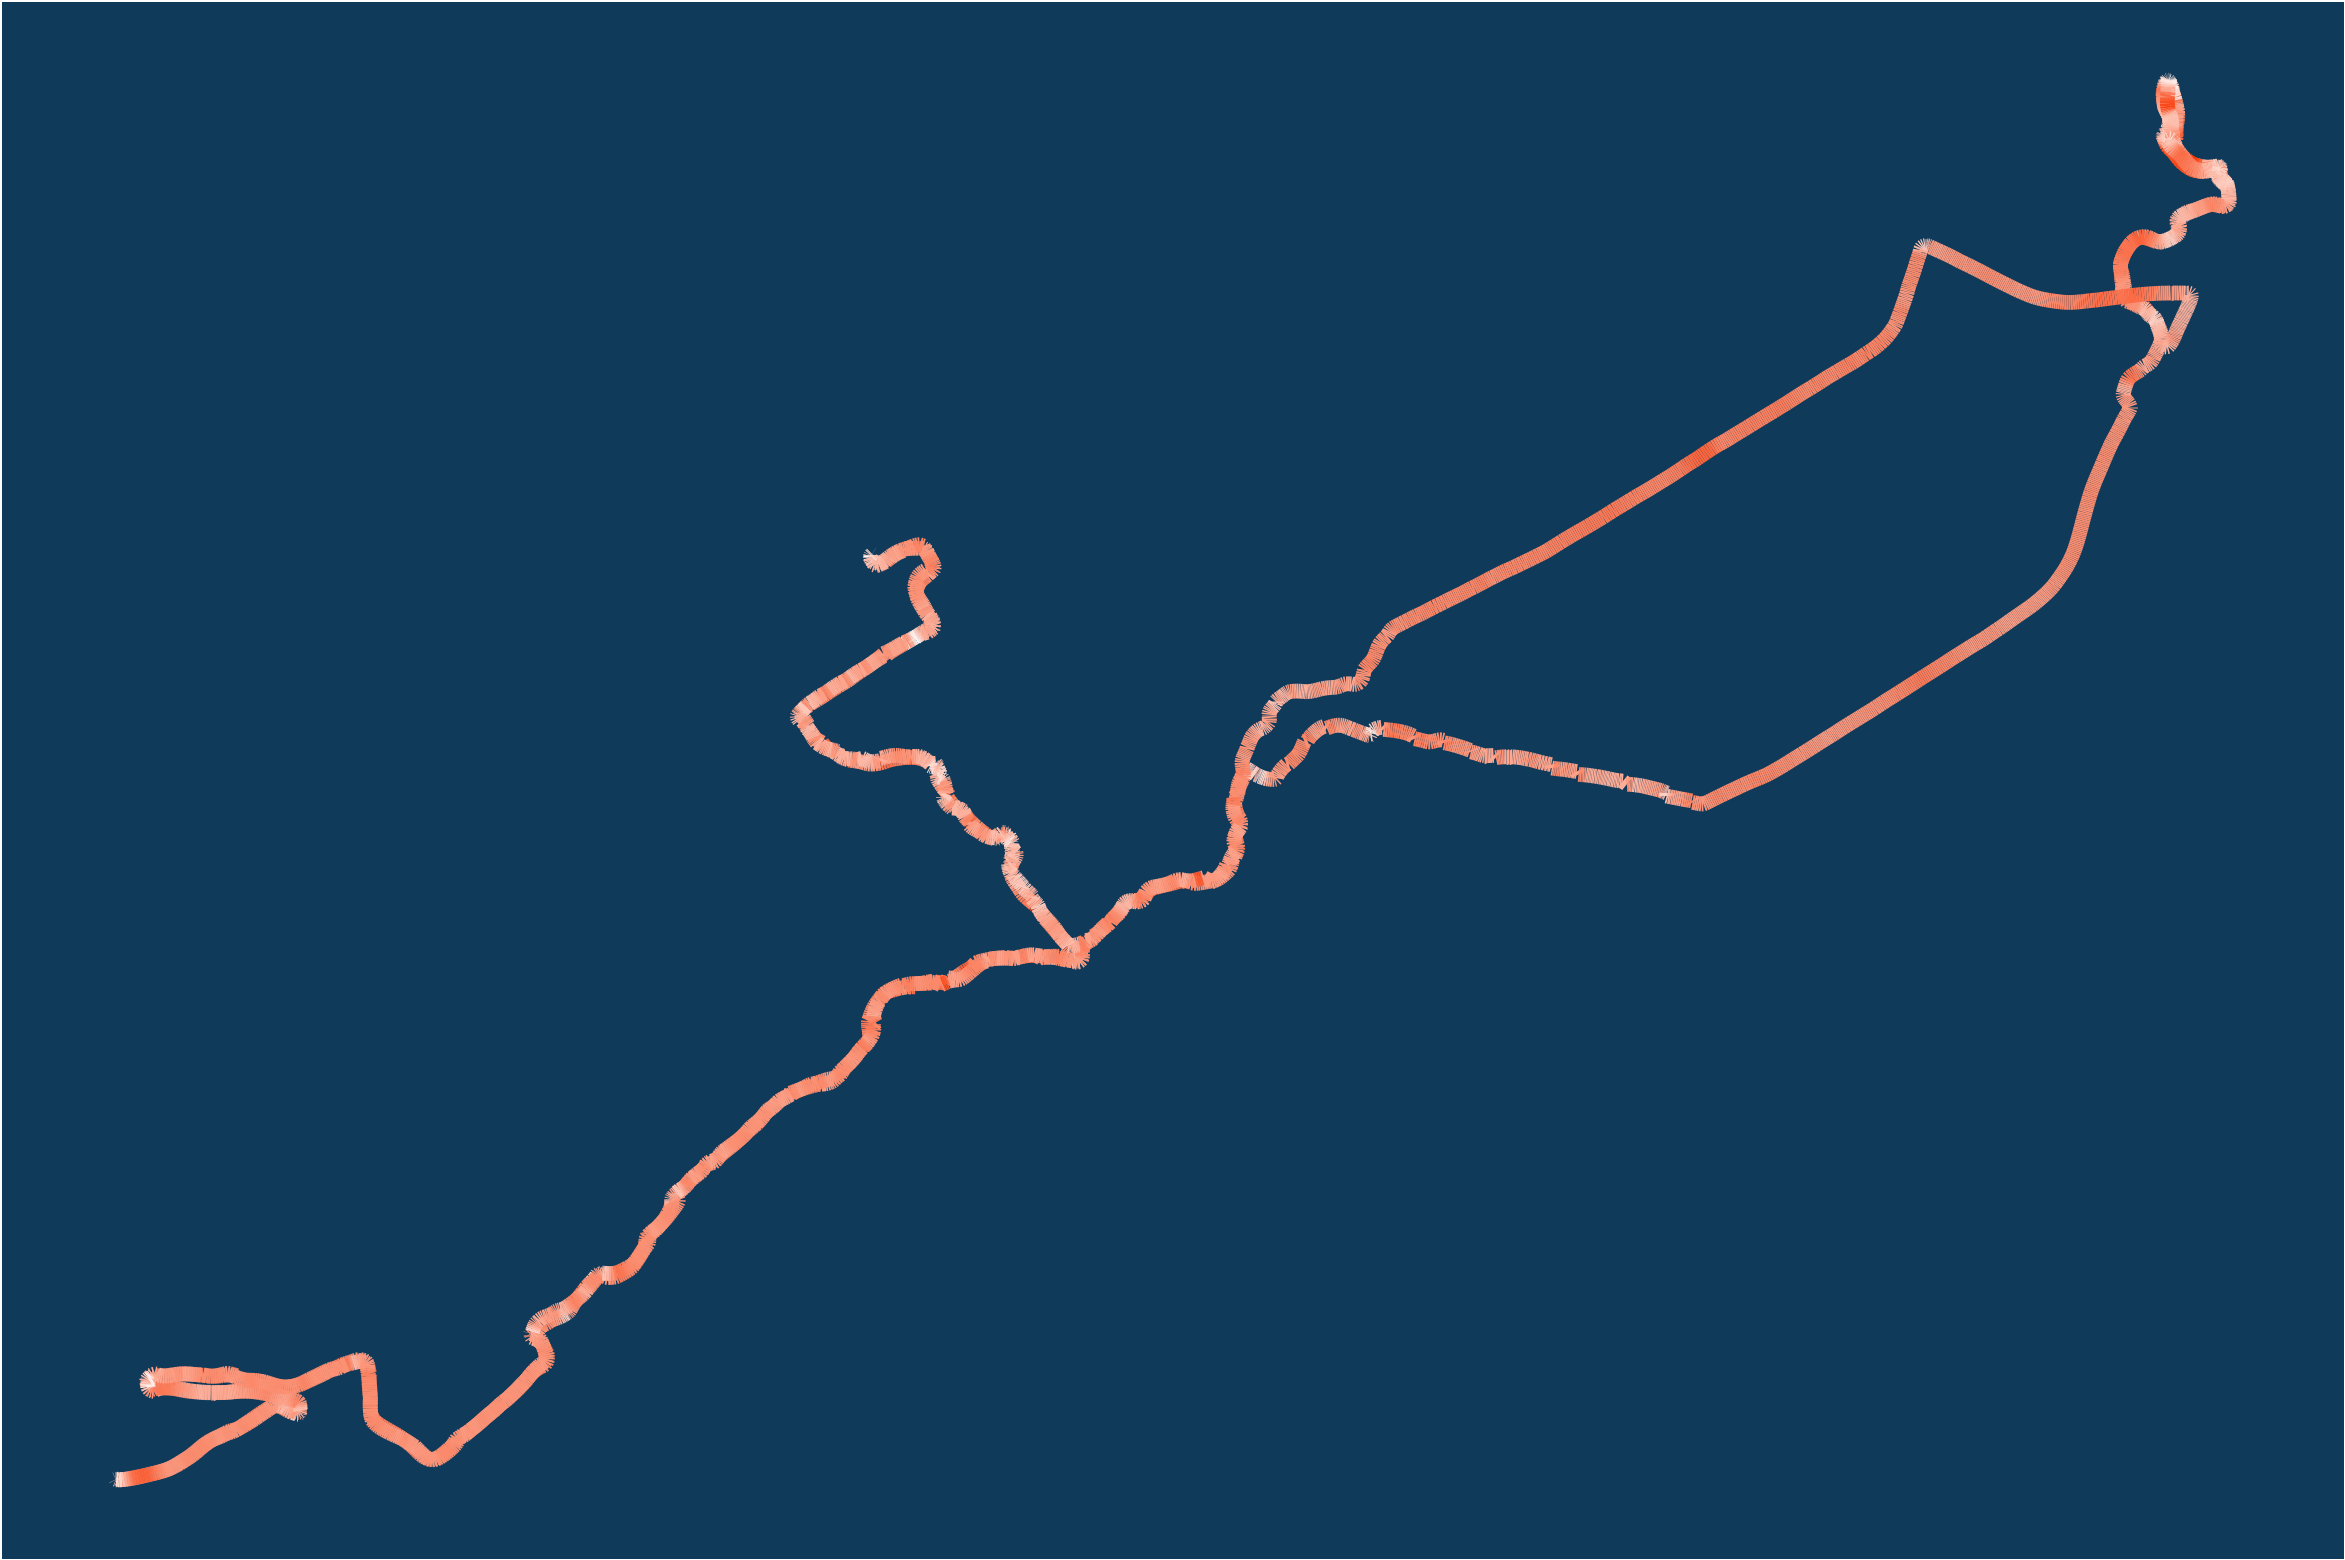

In [135]:
g = (ggplot(data=poly_df)
    + gg.geom_path(aes(x="lat", y="long", colour="speed"), size=6)
    + gg.scale_colour_gradientn(colors=["white", stred], values=[0, 1], guide=False)
    + gg.theme(figure_size=(15, 10))
    + pt.gg_theme() + gg.theme(panel_grid=gg.element_blank(), 
                               panel_border=gg.element_blank(), 
                               axis_text=gg.element_blank(), 
                               axis_title=gg.element_blank(),
                               axis_ticks=gg.element_blank()))

print(g)

g.save(filename="plots/map.png",
       format="png",
       height=36, width=48,
       limitsize=False,
       transparent=True)